# Przeszukiwanie wierszy (breadth-first search)
Algorytm służący do znaleźenia najkrótszej drogi z węzła A do B w grafie nieważonym lub odpowiedzieć na pytanie czy istnieje droga z węzła A do węzła B.
Poniżej przedstawiłem przykładowy prosty graf nieważony, jego wizualizacje oraz implementacje algorytmu przeszukiwania wierszy. Czas zajmuje **O(V + E)**, gdzie V oznacza liczbę wierzchołków, a E liczę krawędzi.

In [67]:
graph = {"leon": ["alicja", "bartek", "cecylia"], "bartek": ["janusz", "michal"], "alicja": ["michal"], "cecylia": ["tamara", "jarek"], "janusz": [], "michal": [], "tamara": [], "jarek": []}
print(graph)

{'leon': ['alicja', 'bartek', 'cecylia'], 'bartek': ['janusz', 'michal'], 'alicja': ['michal'], 'cecylia': ['tamara', 'jarek'], 'janusz': [], 'michal': [], 'tamara': [], 'jarek': []}


leon is connected to alicja
leon is connected to bartek
leon is connected to cecylia
bartek is connected to janusz
bartek is connected to michal
alicja is connected to michal
cecylia is connected to tamara
cecylia is connected to jarek


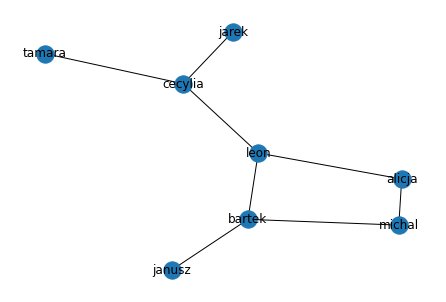

In [68]:
import networkx as nx
import matplotlib.pyplot as plt

def visualiseGraph(graph):
    G = nx.Graph()
    for vertex, edges in graph.items():
        G.add_node("%s" % vertex)
        for edge in edges:
            G.add_node("%s" % edge)
            G.add_edge("%s" % vertex, "%s" % edge)
            print(f"{vertex} is connected to {edge}")

    nx.draw(G, with_labels=True)
    plt.show()

visualiseGraph(graph)

{'leon': ['alicja', 'bartek', 'cecylia'], 'bartek': ['janusz', 'michal'], 'alicja': ['michal'], 'cecylia': ['tamara', 'jarek'], 'janusz': [], 'michal': [], 'tamara': [], 'jarek': []}
leon is connected to alicja
leon is connected to bartek
leon is connected to cecylia
bartek is connected to janusz
bartek is connected to michal
alicja is connected to michal
cecylia is connected to tamara
cecylia is connected to jarek
tamara is connected to adam
jarek is connected to adam


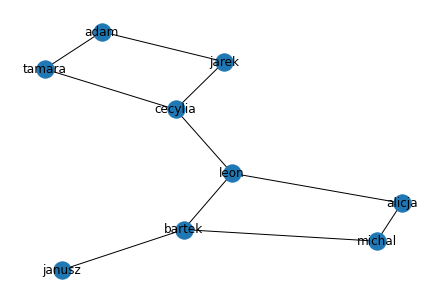

In [69]:
graphWithSomeoneEndsWithM = {"leon": ["alicja", "bartek", "cecylia"], "bartek": ["janusz", "michal"], "alicja": ["michal"], "cecylia": ["tamara", "jarek"], "janusz": [], "michal": [], "tamara": ["adam"], "jarek": ["adam"], "adam": []}
print(graph)
visualiseGraph(graphWithSomeoneEndsWithM)

## Implementacja zawierająca biblioteke deque
Algorytm odpowie na pytanie czy w grafie jest ktoś kogo imie kończy się na literę m

In [70]:
from collections import deque

def person_ends_with_m(name): #simple function that's checking if person name ends with letter 'm'
    return name[-1] == 'm'

def is_someone_ends_with_letter_m_in_graph(startsFromName, searchingGraph):
    search_queue = deque()
    search_queue += graph[startsFromName]
    searched = []
    while search_queue:
        person = search_queue.popleft()
        if not person in searched:
            if person_ends_with_m(person):
                print(f"{person}'s name ends with letter m")
                return True
            else:
                search_queue += searchingGraph[person]
                searched.append(person)
    return False


print(f"Function returned {is_someone_ends_with_letter_m_in_graph('leon', graph)} when using graph named graph")
print(f"Function returned {is_someone_ends_with_letter_m_in_graph('leon', graphWithSomeoneEndsWithM)} when using graph named graphWithSomeoneEndsWithM")

Function returned False when using graph named graph
adam's name ends with letter m
Function returned True when using graph named graphWithSomeoneEndsWithM


## Implementacja niezawierająca biblioteke deque (mniej optymalna struktura danych)

In [71]:
def person_ends_with_m(name): #simple function that's checking if person name ends with letter 'm'
    return name[-1] == 'm'

def is_someone_ends_with_letter_m_in_graph(startsFromName, searchingGraph):
    search_queue = []
    search_queue.extend(graph[startsFromName])
    searched = []
    while search_queue:
        person = search_queue[0]
        search_queue.pop(0)
        if not person in searched:
            if person_ends_with_m(person):
                print(f"{person}'s name ends with letter m")
                return True
            else:
                neighbors = searchingGraph[person]
                search_queue.extend(neighbors)
                searched.append(person)
    return False


print(f"Function returned {is_someone_ends_with_letter_m_in_graph('leon', graph)} when using graph named graph")
print(f"Function returned {is_someone_ends_with_letter_m_in_graph('leon', graphWithSomeoneEndsWithM)} when using graph named graphWithSomeoneEndsWithM")

Function returned False when using graph named graph
adam's name ends with letter m
Function returned True when using graph named graphWithSomeoneEndsWithM
